In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cpu'

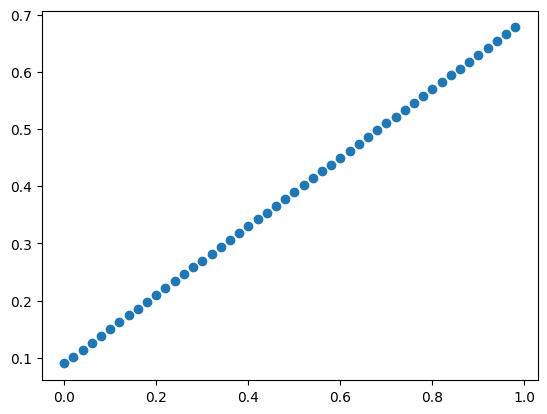

In [15]:
weight = 0.6
bias = 0.09
start =0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [16]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None)->None:
    plt.scatter(
        X_train.numpy(),
        y_train.numpy(),
        c="c",
        label="train data"
    )
    plt.scatter(
        X_test.numpy(),
        y_test.numpy(),
        c="m",
        label="test data"
    )
    if predictions is not None:
        plt.plot(
            X_test.numpy(),
            predictions.numpy(),
            c="r",
            label="predictions"
        )
    plt.legend()
    plt.show()


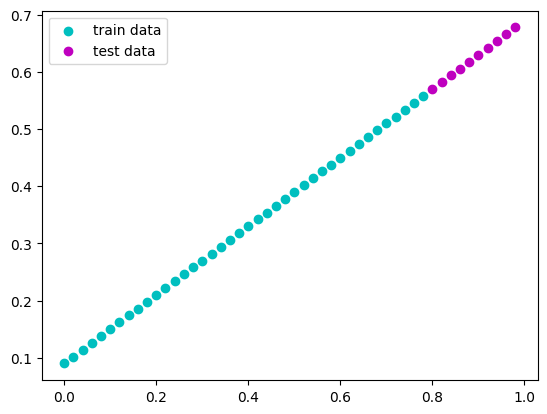

In [17]:
train_data_count:int=int(len(X)*0.8)
X_train,X_test = X[:train_data_count],X[train_data_count:]
y_train,y_test = y[:train_data_count],y[train_data_count:]
plot_predictions(X_train, y_train, X_test, y_test, None)

In [18]:
class LinearRegressionCustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [19]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(in_features=1,out_features=1)
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.linear(x)

In [20]:
def trainer(epochs:int, learning_rate:float, model:nn.Module, loss_fn:nn.Module, optimizer:torch.optim.Optimizer, X_train:torch.Tensor, y_train:torch.Tensor)->None:
    for epoch in range(epochs):
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 5 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

In [21]:
model_0 = LinearRegressionCustomModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8567], requires_grad=True),
 Parameter containing:
 tensor([0.8786], requires_grad=True)]

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8567])), ('bias', tensor([0.8786]))])

In [27]:
learning_rate = 0.001
epochs = 1000
loss_fn= nn.L1Loss()
optimize=torch.optim.Adam(model_0.parameters(),lr=learning_rate)
trainer(epochs, learning_rate, model_0, loss_fn, optimize, X_train, y_train)


Epoch: 0 | Loss: 0.04036136344075203
Epoch: 5 | Loss: 0.038926370441913605
Epoch: 10 | Loss: 0.037584029138088226
Epoch: 15 | Loss: 0.03632795810699463
Epoch: 20 | Loss: 0.03518805652856827
Epoch: 25 | Loss: 0.0340639129281044
Epoch: 30 | Loss: 0.03298627585172653
Epoch: 35 | Loss: 0.03189794346690178
Epoch: 40 | Loss: 0.030839335173368454
Epoch: 45 | Loss: 0.029771948233246803
Epoch: 50 | Loss: 0.02871432900428772
Epoch: 55 | Loss: 0.027662506327033043
Epoch: 60 | Loss: 0.026607003062963486
Epoch: 65 | Loss: 0.025560548529028893
Epoch: 70 | Loss: 0.02451520785689354
Epoch: 75 | Loss: 0.023473402485251427
Epoch: 80 | Loss: 0.02243124134838581
Epoch: 85 | Loss: 0.02139359526336193
Epoch: 90 | Loss: 0.02035323902964592
Epoch: 95 | Loss: 0.019316846504807472
Epoch: 100 | Loss: 0.018279708921909332
Epoch: 105 | Loss: 0.017245808616280556
Epoch: 110 | Loss: 0.01621285453438759
Epoch: 115 | Loss: 0.015181501396000385
Epoch: 120 | Loss: 0.014148701913654804
Epoch: 125 | Loss: 0.01311822049319

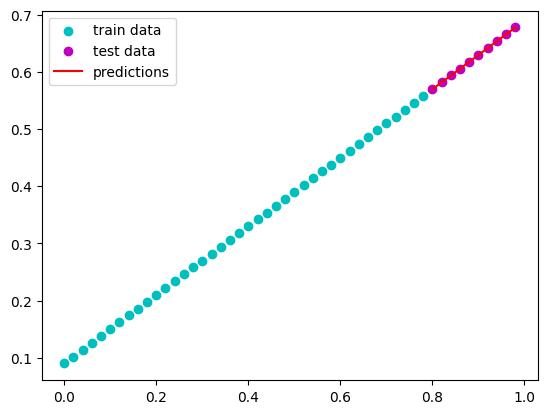

In [28]:
with torch.inference_mode():
    predictions = model_0(X_test)
    plot_predictions(X_train, y_train, X_test, y_test, predictions)


In [25]:
model_1 = LinearRegressionModel()
loss_fn= nn.L1Loss()
optimize=torch.optim.Adam(model_1.parameters(),lr=learning_rate)
trainer(epochs, learning_rate, model_1, loss_fn, optimize, X_train, y_train)

Epoch: 0 | Loss: 0.28542274236679077
Epoch: 5 | Loss: 0.27847281098365784
Epoch: 10 | Loss: 0.2715228796005249
Epoch: 15 | Loss: 0.26457297801971436
Epoch: 20 | Loss: 0.2576230466365814
Epoch: 25 | Loss: 0.2506731450557709
Epoch: 30 | Loss: 0.24372324347496033
Epoch: 35 | Loss: 0.2367733269929886
Epoch: 40 | Loss: 0.22982342541217804
Epoch: 45 | Loss: 0.2228734940290451
Epoch: 50 | Loss: 0.21592359244823456
Epoch: 55 | Loss: 0.208973690867424
Epoch: 60 | Loss: 0.20202378928661346
Epoch: 65 | Loss: 0.19507387280464172
Epoch: 70 | Loss: 0.18812395632266998
Epoch: 75 | Loss: 0.18117406964302063
Epoch: 80 | Loss: 0.1742241084575653
Epoch: 85 | Loss: 0.1672741174697876
Epoch: 90 | Loss: 0.16032414138317108
Epoch: 95 | Loss: 0.15337415039539337
Epoch: 100 | Loss: 0.14642415940761566
Epoch: 105 | Loss: 0.13947418332099915
Epoch: 110 | Loss: 0.13252419233322144
Epoch: 115 | Loss: 0.12557420134544373
Epoch: 120 | Loss: 0.1186242327094078
Epoch: 125 | Loss: 0.1116742342710495
Epoch: 130 | Loss: 

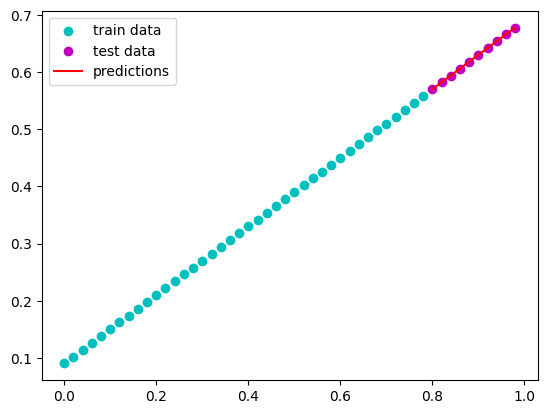

In [26]:
with torch.inference_mode():
    predictions = model_1(X_test)
    plot_predictions(X_train, y_train, X_test, y_test, predictions)